In [12]:
function run_simulation(;gridsize=20, gradedMesh=1, laplaceProblem=0, visualize=-1, debugOut=0)
    readall(`../build/Exercise2 $gridsize $gradedMesh $laplaceProblem $visualize $debugOut`)
end

run_simulation (generic function with 1 method)

In [13]:
function compute_error_norm(;gridsize=20, gradedMesh=1, laplaceProblem=0, visualize=-1, debugOut=0)
    output=run_simulation(gridsize=gridsize, gradedMesh=gradedMesh, laplaceProblem=laplaceProblem, visualize=visualize, debugOut=debugOut)
    error_norm = split(output, '\n')[end-1]
    float(match(r"Error norm is ([0-9.]*)", error_norm)[1])
end

compute_error_norm (generic function with 1 method)

In [14]:
function convergence_plot(equation, N, error_norm)
    error_norm_fit=polyfit(log(N), log(error_norm), 1)
    
    loglog(N, error_norm, label="\$||u - u_N||_K\$") # plot error norm
    loglog(N, exp(log(N)*round(error_norm_fit[2])), label="\$O(N^{$(round(error_norm_fit[2]))})\$") # plot fitted error norm
    xlabel("Grid size N")
    ylabel("error")
    legend()
    title("Convergency study for the $(equation) equation")
end

convergence_plot (generic function with 1 method)

In [15]:
function polyfit(x, y, n)
  A = [ float(x[i])^p for i = 1:length(x), p = 0:n ]
  A \ y
end

polyfit (generic function with 1 method)

# Convergence study

In [16]:
using PyPlot

In [17]:
N = [3,5,8,16,32];

## Poisson equation

In [22]:
error_norm_poisson = map((n) -> compute_error_norm(laplaceProblem=0, gridsize=n), N)

5-element Array{Float64,1}:
 0.312731
 0.127167
 0.048173
 0.011198
 0.002661

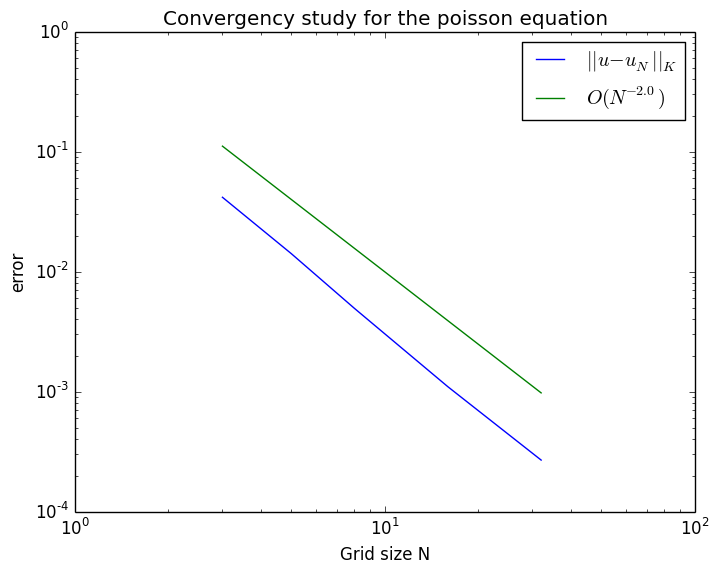

PyObject <matplotlib.text.Text object at 0x316f30a10>

In [21]:
convergence_plot("poisson", N, error_norm_poisson)

## Laplace equation

In [9]:
N = [3,5,8,16,32];

In [10]:
error_norm_laplace = map((n) -> compute_error_norm(laplaceProblem=1, gridsize=n), N)

5-element Array{Float64,1}:
 0.013333
 0.003569
 0.001259
 0.000323
 8.0e-5  

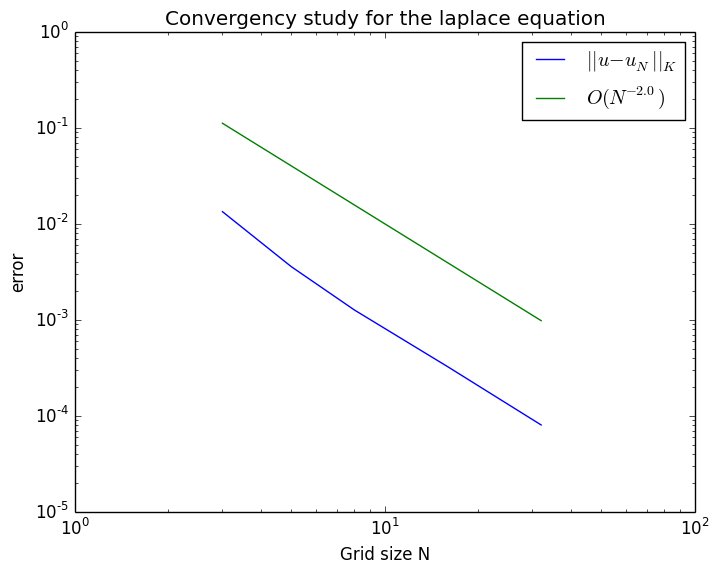

PyObject <matplotlib.text.Text object at 0x31671ced0>

In [11]:
convergence_plot("laplace", N, error_norm_laplace)